In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore') #import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive') #mount drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
d1=pd.read_csv('/content/train.csv')
d1.head(10) #train set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
d2=pd.read_csv('/content/test.csv')
d2.head(10) #test set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
d1.info() #info about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
d1.nunique() #no of unique columns

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
d1.duplicated().sum() #check duplicates

0

In [11]:
d1.isnull().sum() #check null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
d1.drop('Cabin', axis = 1, inplace = True)
d1.head() #drop cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
d1.Age.replace(np.nan,d1.Age.mean(),inplace=True)
d1.Embarked.replace(np.nan,d1.Embarked.mode()[0], inplace=True) #replace mmissing values with mean

<Axes: xlabel='Age', ylabel='Density'>

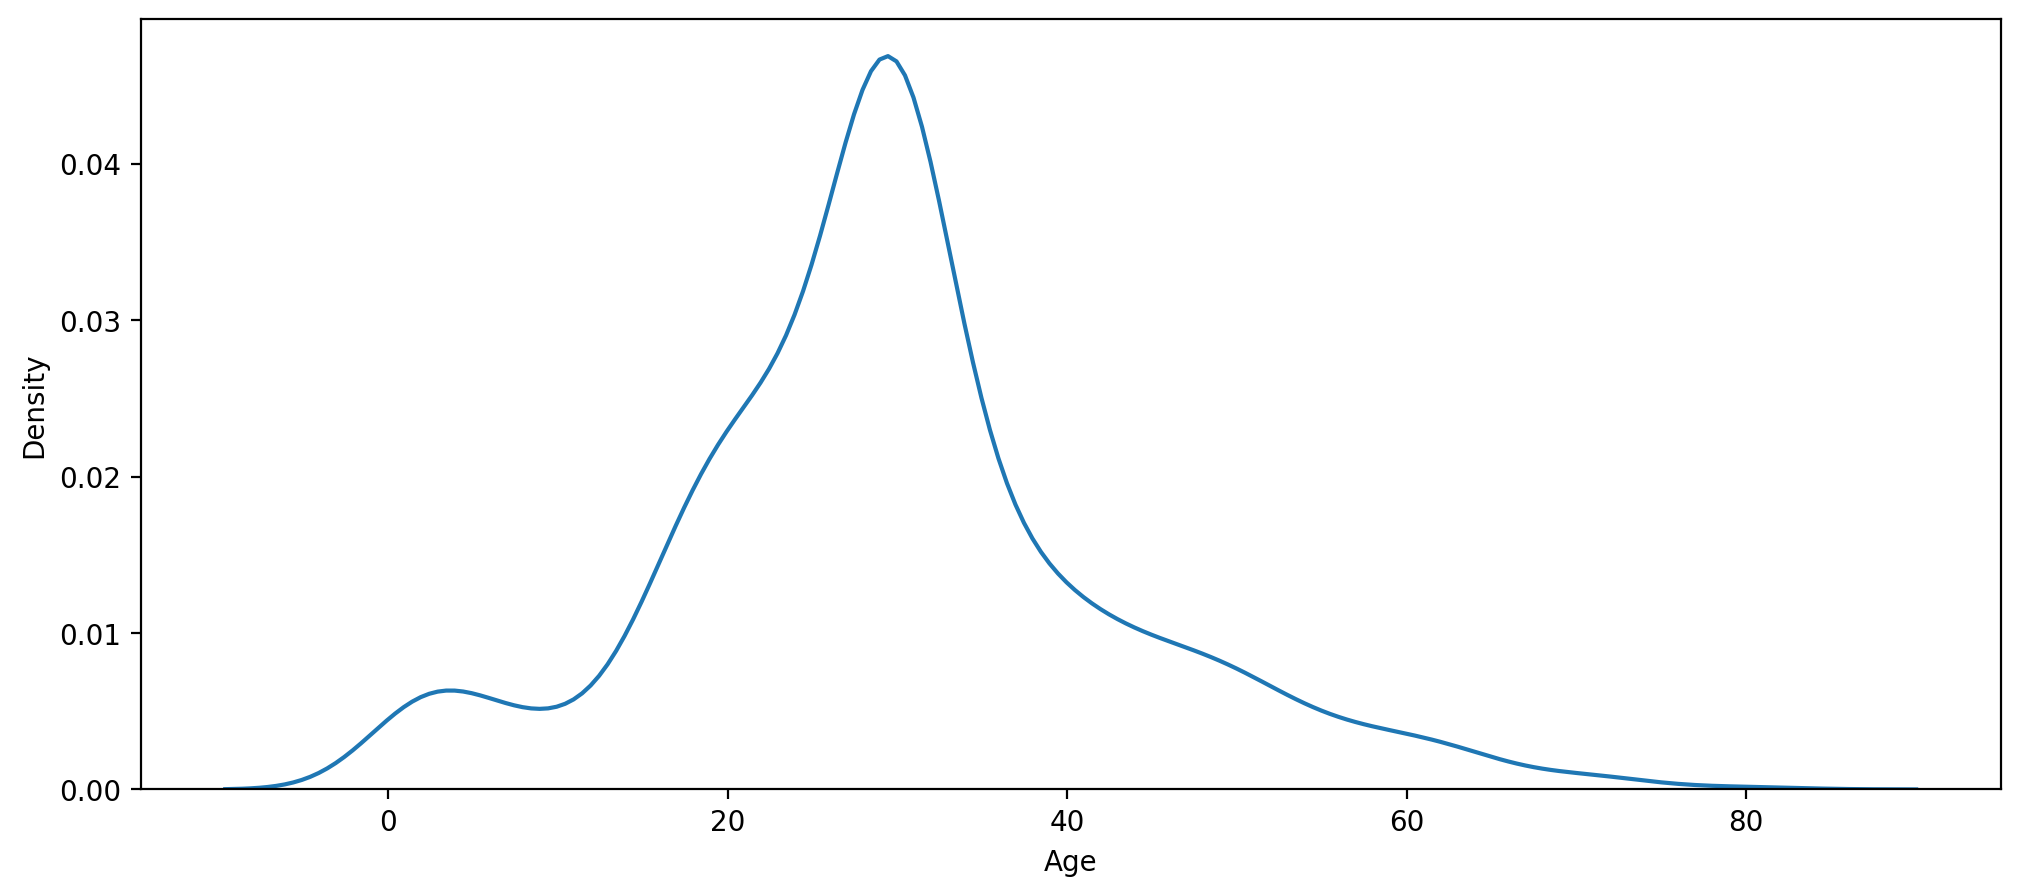

In [17]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(d1.Age, hist = False) #max age range from 20 - 40

In [18]:
# Creating a new column family_members by adding SibSp and Parch
d1['family_members'] = d1.SibSp + d1.Parch
d1.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

d1.head() #merge both column as family membr

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [19]:
# Creating a new column family_members by adding SibSp and Parch
d2['family_members'] = d2.SibSp + d2.Parch
d2.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

d2.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,2


<Axes: xlabel='Survived', ylabel='count'>

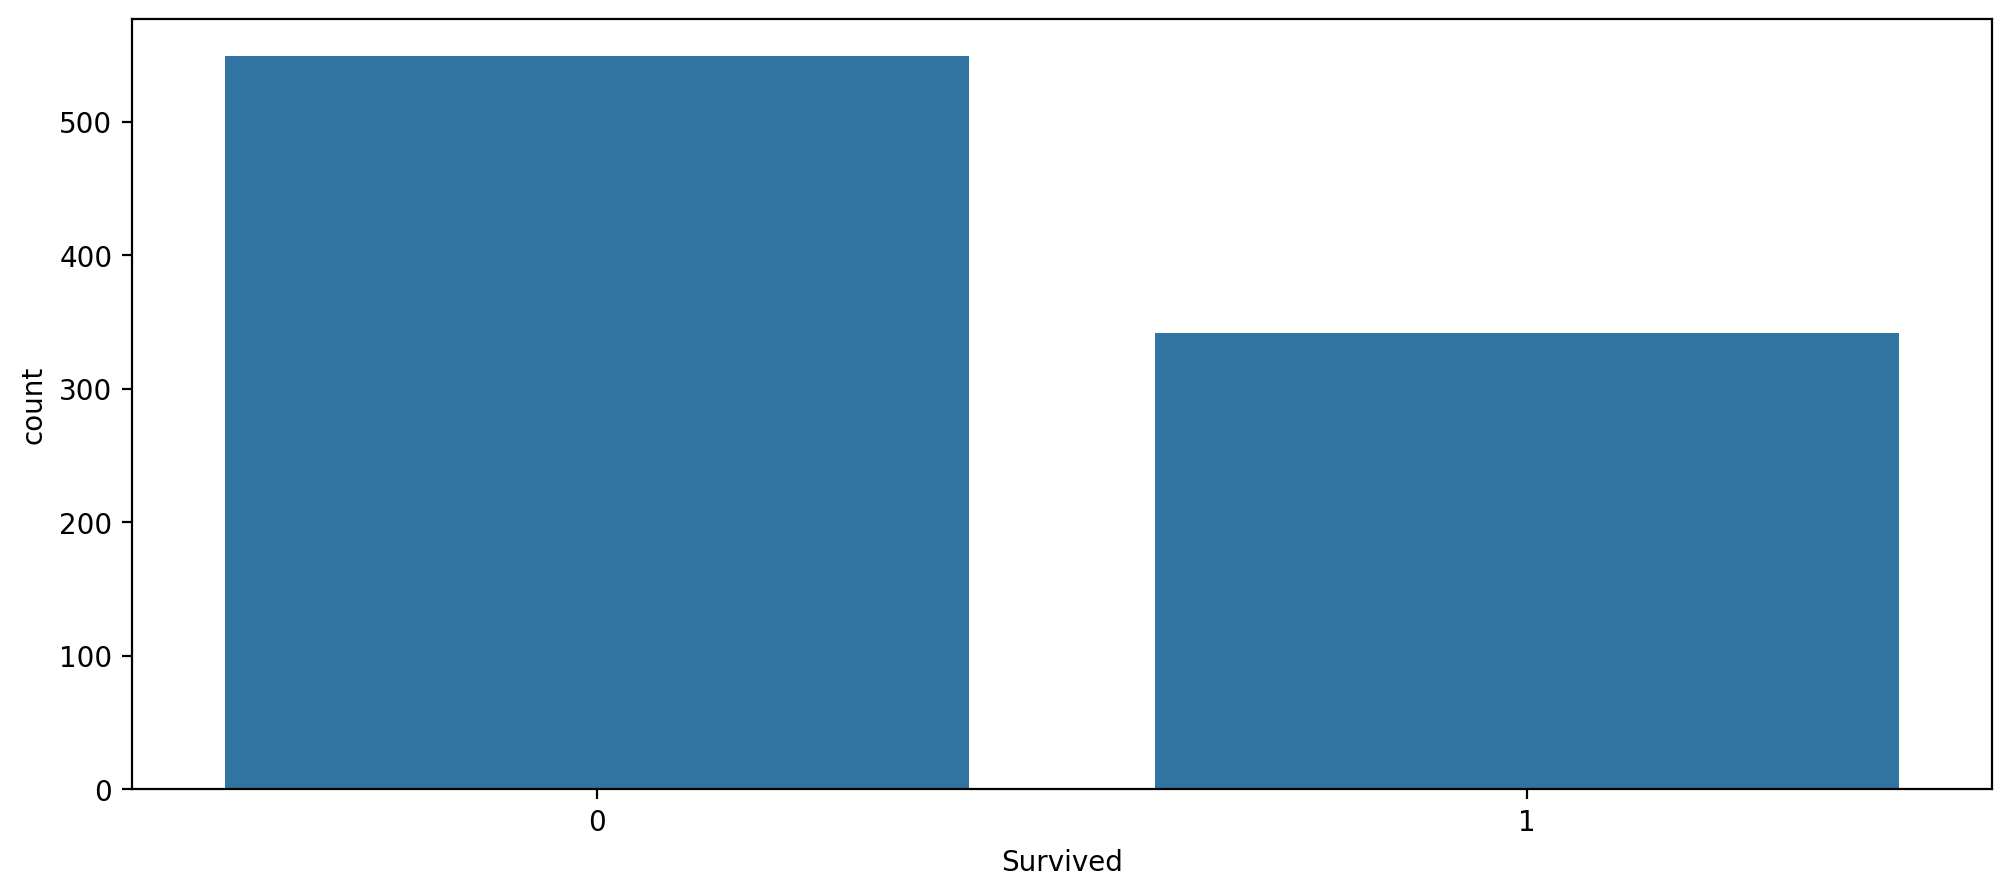

In [20]:
# How many passengers survived and how many did not survive
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Survived', data =d1)

In [21]:
d1.Survived.value_counts() #counts of survived column

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

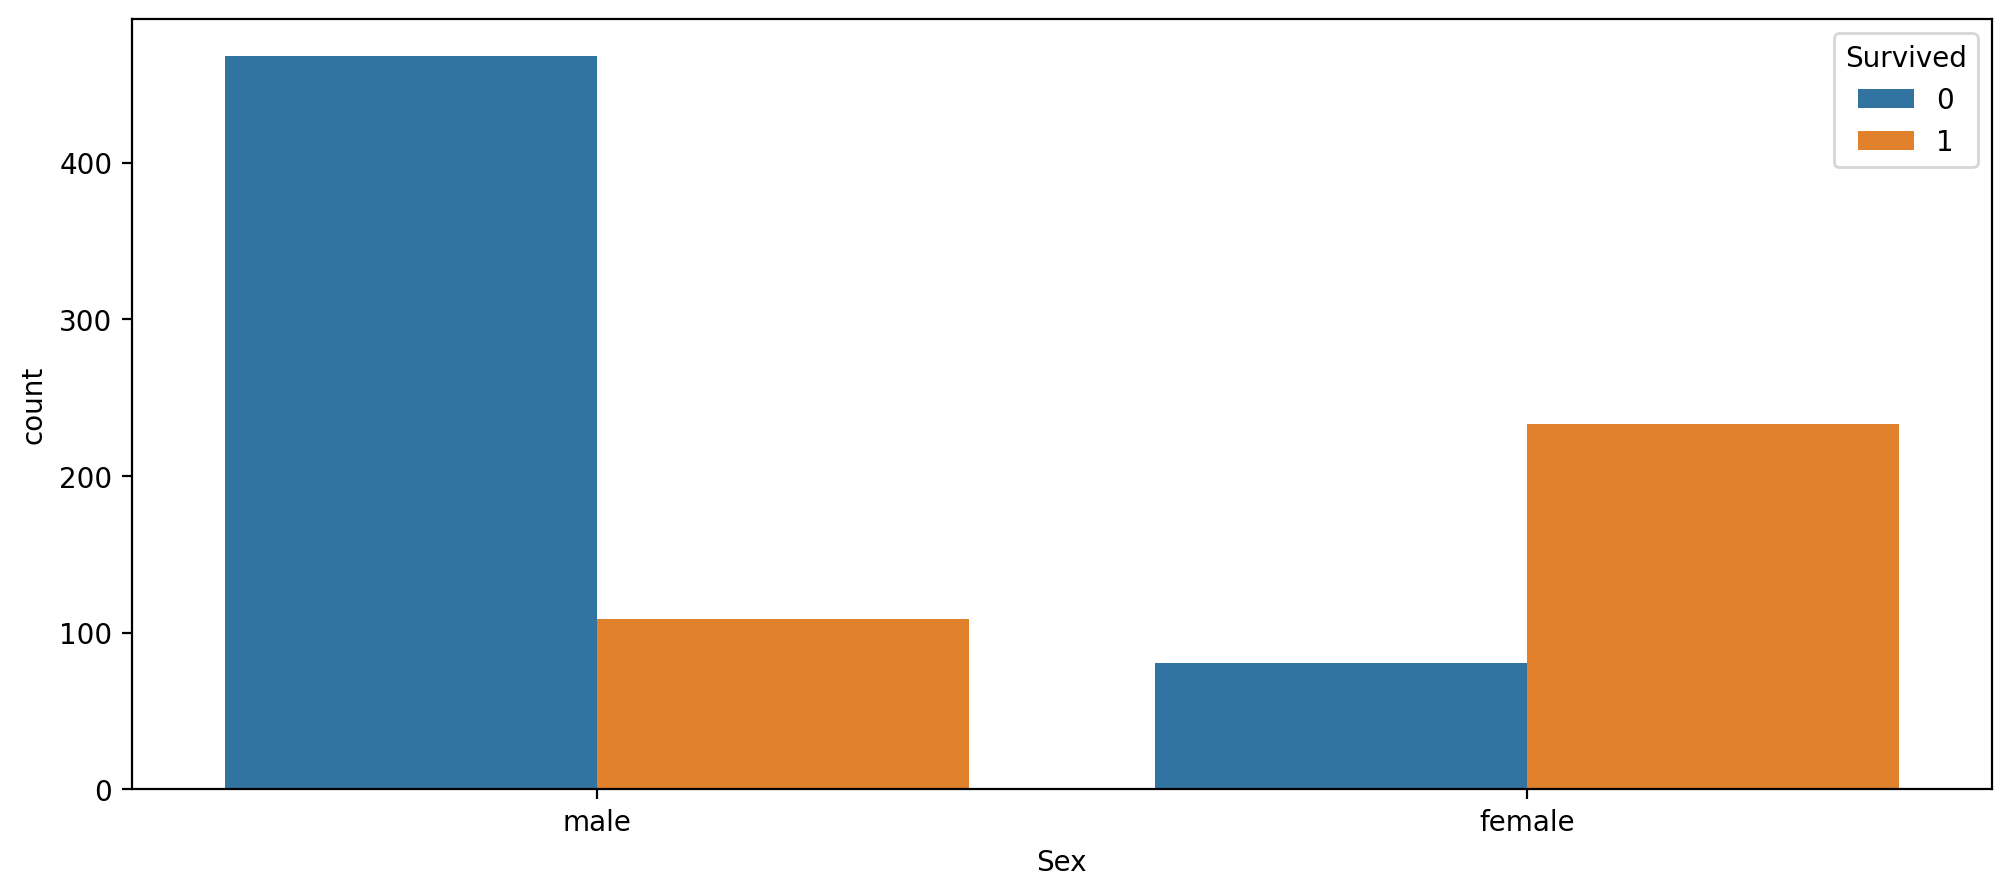

In [22]:
# Analysing gender and survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Sex', hue = 'Survived', data = d1)#female survived more

In [23]:
svl_rate = d1.groupby('Sex').Survived.value_counts(normalize = True)
svl_rate #female survival rate is 74%

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Female Survival')

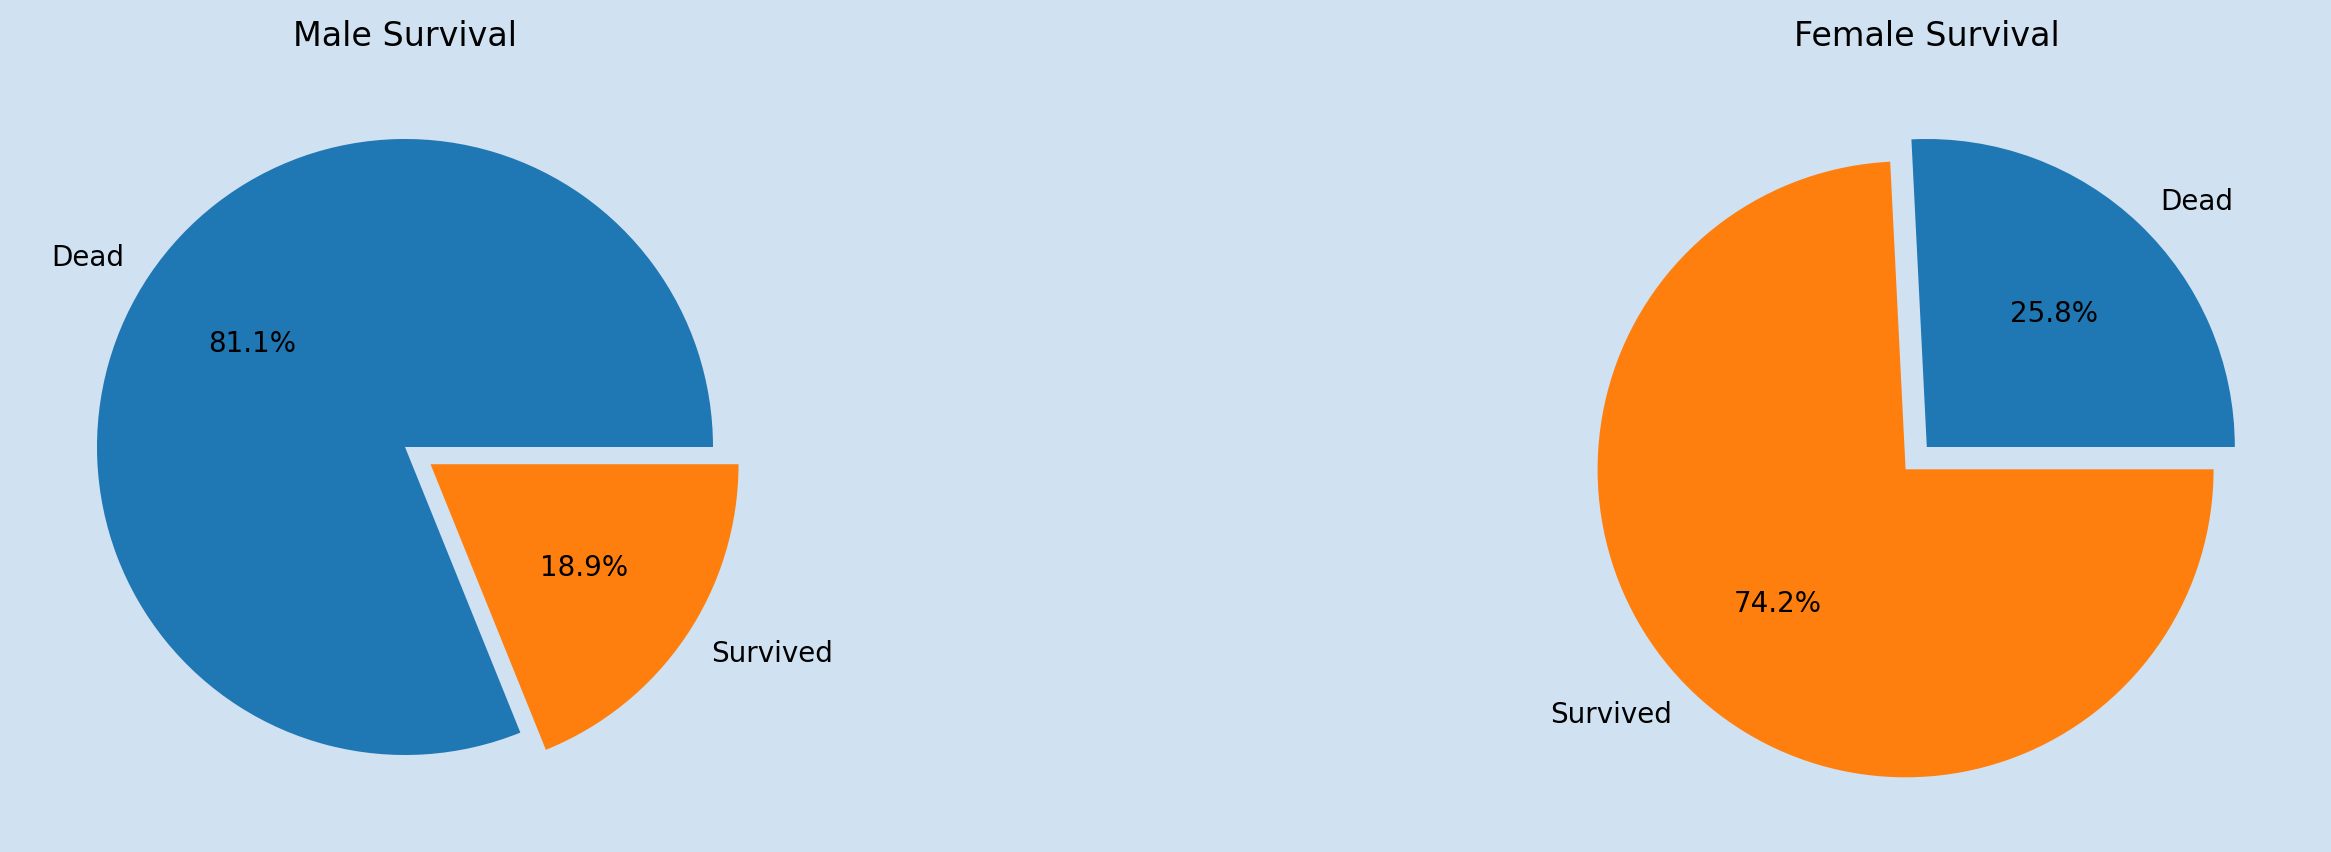

In [24]:
svl_rate = svl_rate.sort_index()
males = svl_rate['male']
females = svl_rate['female']
labels = ['Dead', 'Survived']

plt.figure(figsize = (18,5), dpi = 200, facecolor = '#d0e1f2')
plt.subplot(1,2,1)
plt.pie(males, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Male Survival')
plt.subplot(1,2,2)
plt.pie(females, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Female Survival') #survival percentage shown in plot

<Axes: xlabel='Pclass', ylabel='count'>

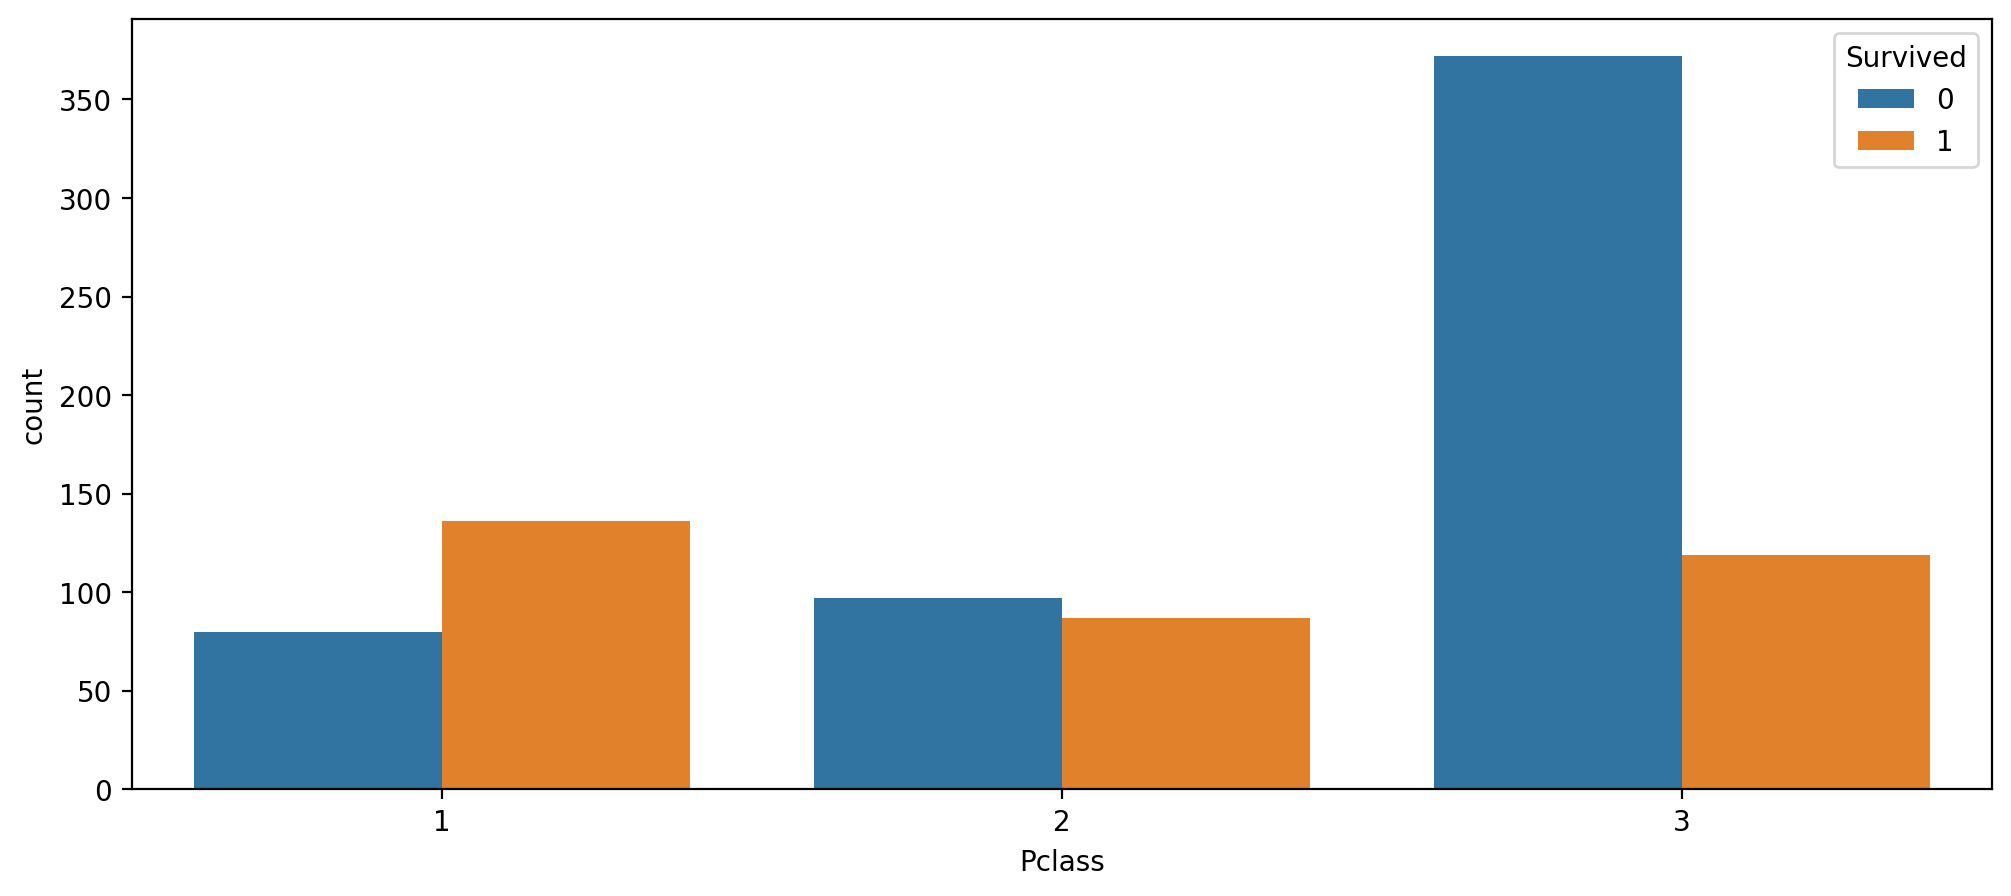

In [25]:
# Analysing passenger class and survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Pclass', hue = 'Survived', data = d1)#passenger travel in first class survive more

In [26]:
svl_rate = d1.groupby('Pclass')['Survived'].value_counts(normalize  = True)
svl_rate#pclass 1 have more survival

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

In [27]:
print('Percentage of 1st Passenger class Survivors : ', round(svl_rate[1][1]*100,2), '%')
print('Percentage of 1st Passenger class Dead      : ', round(svl_rate[1][0]*100,2), '%')
print('Percentage of 2nd Passenger class Survivors : ', round(svl_rate[2][1]*100,2), '%')
print('Percentage of 2nd Passenger class Dead      : ', round(svl_rate[2][0]*100,2), '%')
print('Percentage of 3rd Passenger class Survivors : ', round(svl_rate[3][1]*100,2), '%')
print('Percentage of 3rd Passenger class Dead      : ', round(svl_rate[3][0]*100,2), '%')

Percentage of 1st Passenger class Survivors :  62.96 %
Percentage of 1st Passenger class Dead      :  37.04 %
Percentage of 2nd Passenger class Survivors :  47.28 %
Percentage of 2nd Passenger class Dead      :  52.72 %
Percentage of 3rd Passenger class Survivors :  24.24 %
Percentage of 3rd Passenger class Dead      :  75.76 %


Text(0.5, 1.0, 'Passenger Class3')

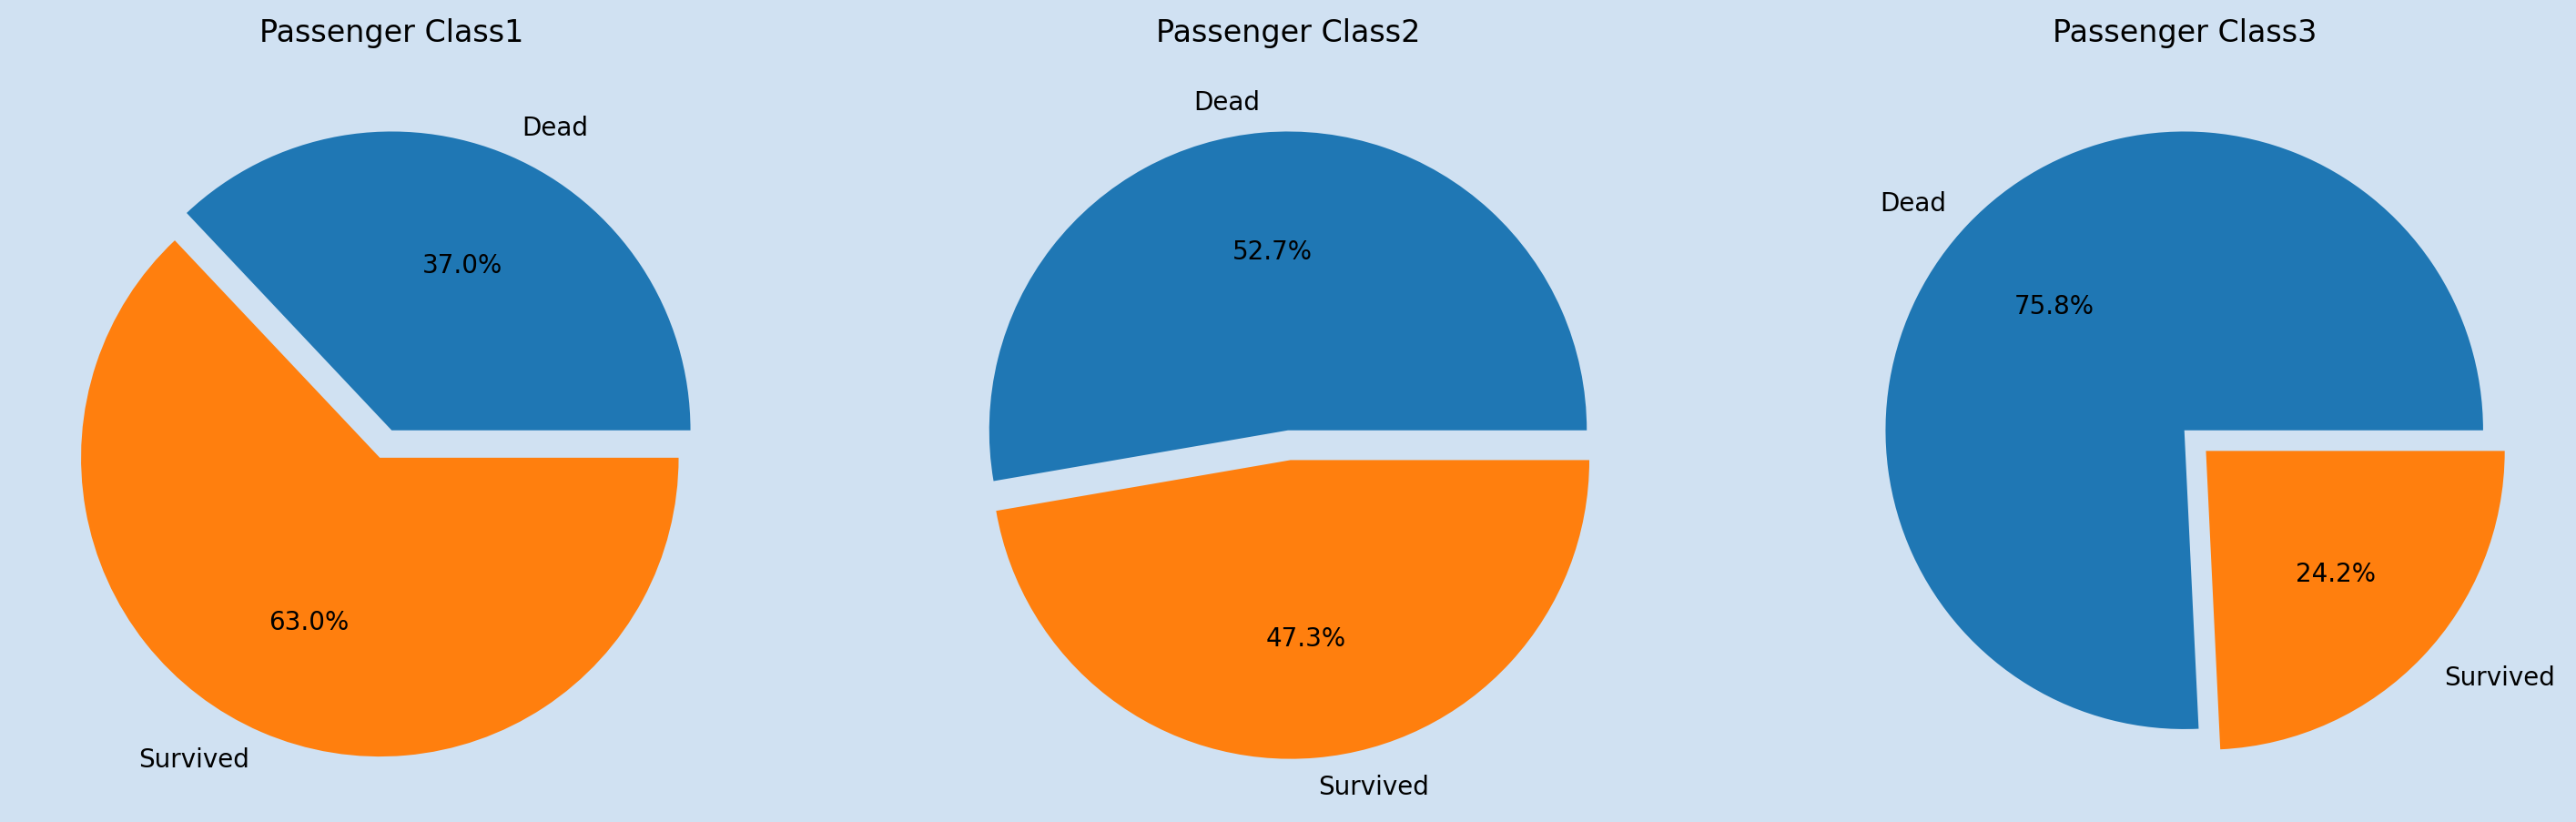

In [28]:
svl_rate = svl_rate.sort_index()
pclass1, pclass2, pclass3 = svl_rate[1], svl_rate[2], svl_rate[3]
labels = ['Dead', 'Survived']

plt.figure(figsize = (18,6), dpi = 200, facecolor = '#d0e1f2')
plt.subplot(1,3,1)
plt.pie(pclass1, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Passenger Class1')
plt.subplot(1,3,2)
plt.pie(pclass2, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Passenger Class2')
plt.subplot(1,3,3)
plt.pie(pclass3, autopct = '%1.1f%%', labels = labels, explode = [0, 0.1])
plt.title('Passenger Class3')

<Axes: xlabel='Embarked', ylabel='count'>

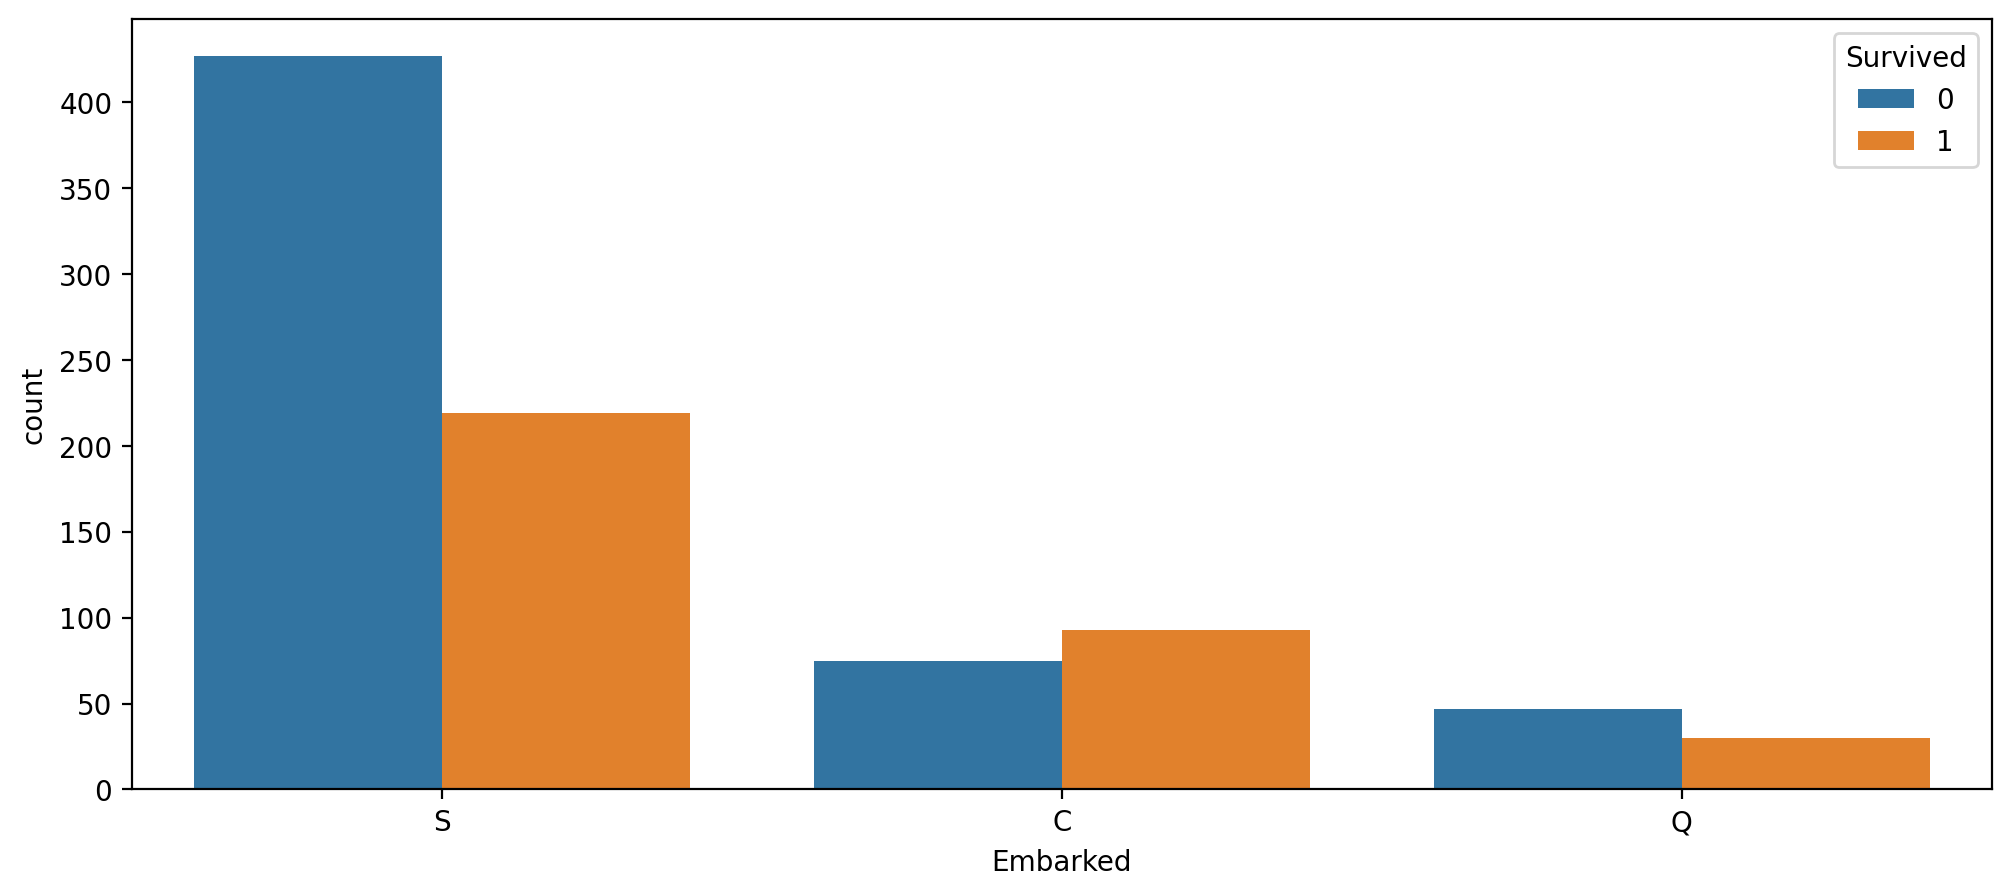

In [29]:
# Analysing Embarked and survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x='Embarked', hue = 'Survived', data = d1)#embarked from s have more survival

<Axes: xlabel='Pclass', ylabel='Fare'>

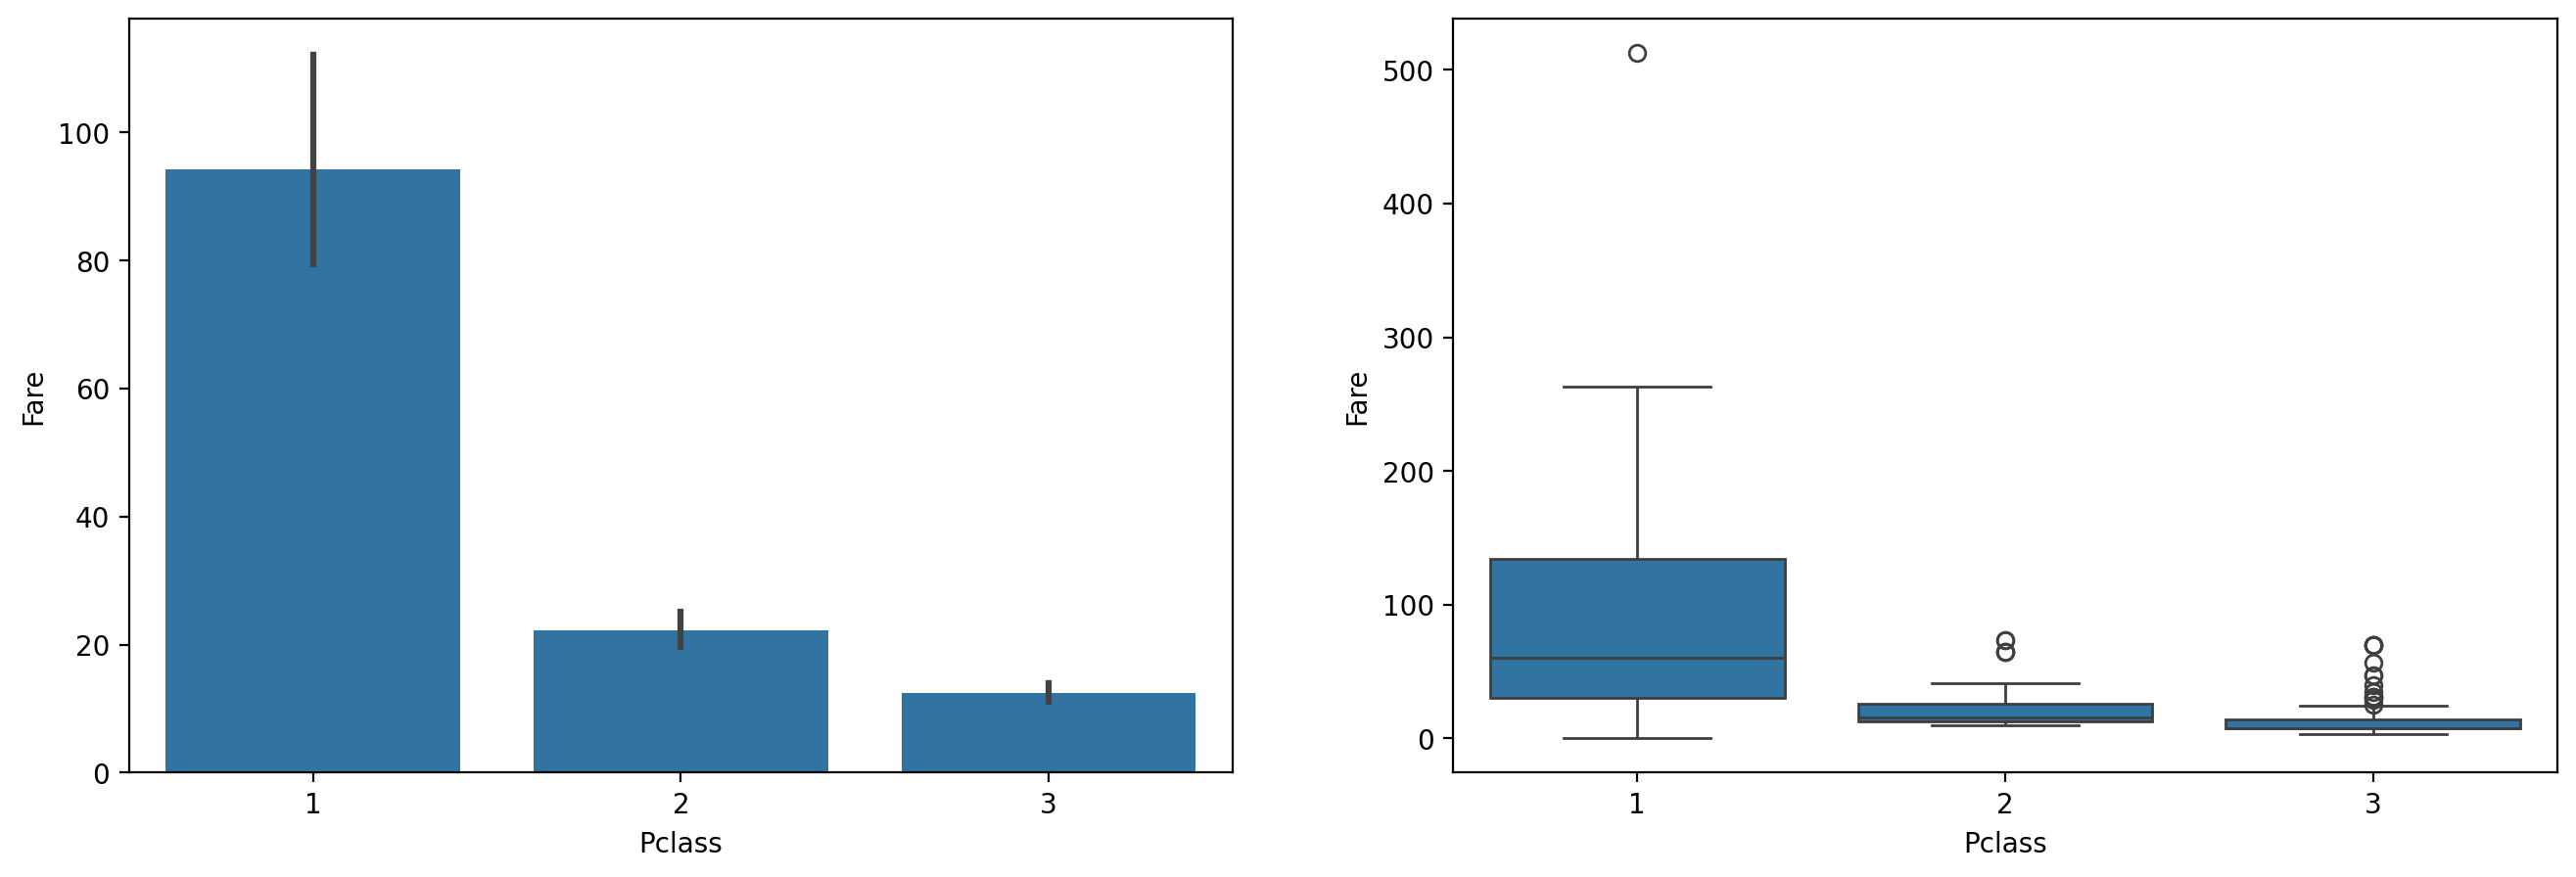

In [30]:
# Fare and Passenger class
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x='Pclass', y='Fare', data = d2)
plt.subplot(1,2,2)
sns.boxplot(x='Pclass',y= 'Fare', data =d2)#fare from passenger class 1 is more

<Axes: xlabel='Survived', ylabel='Fare'>

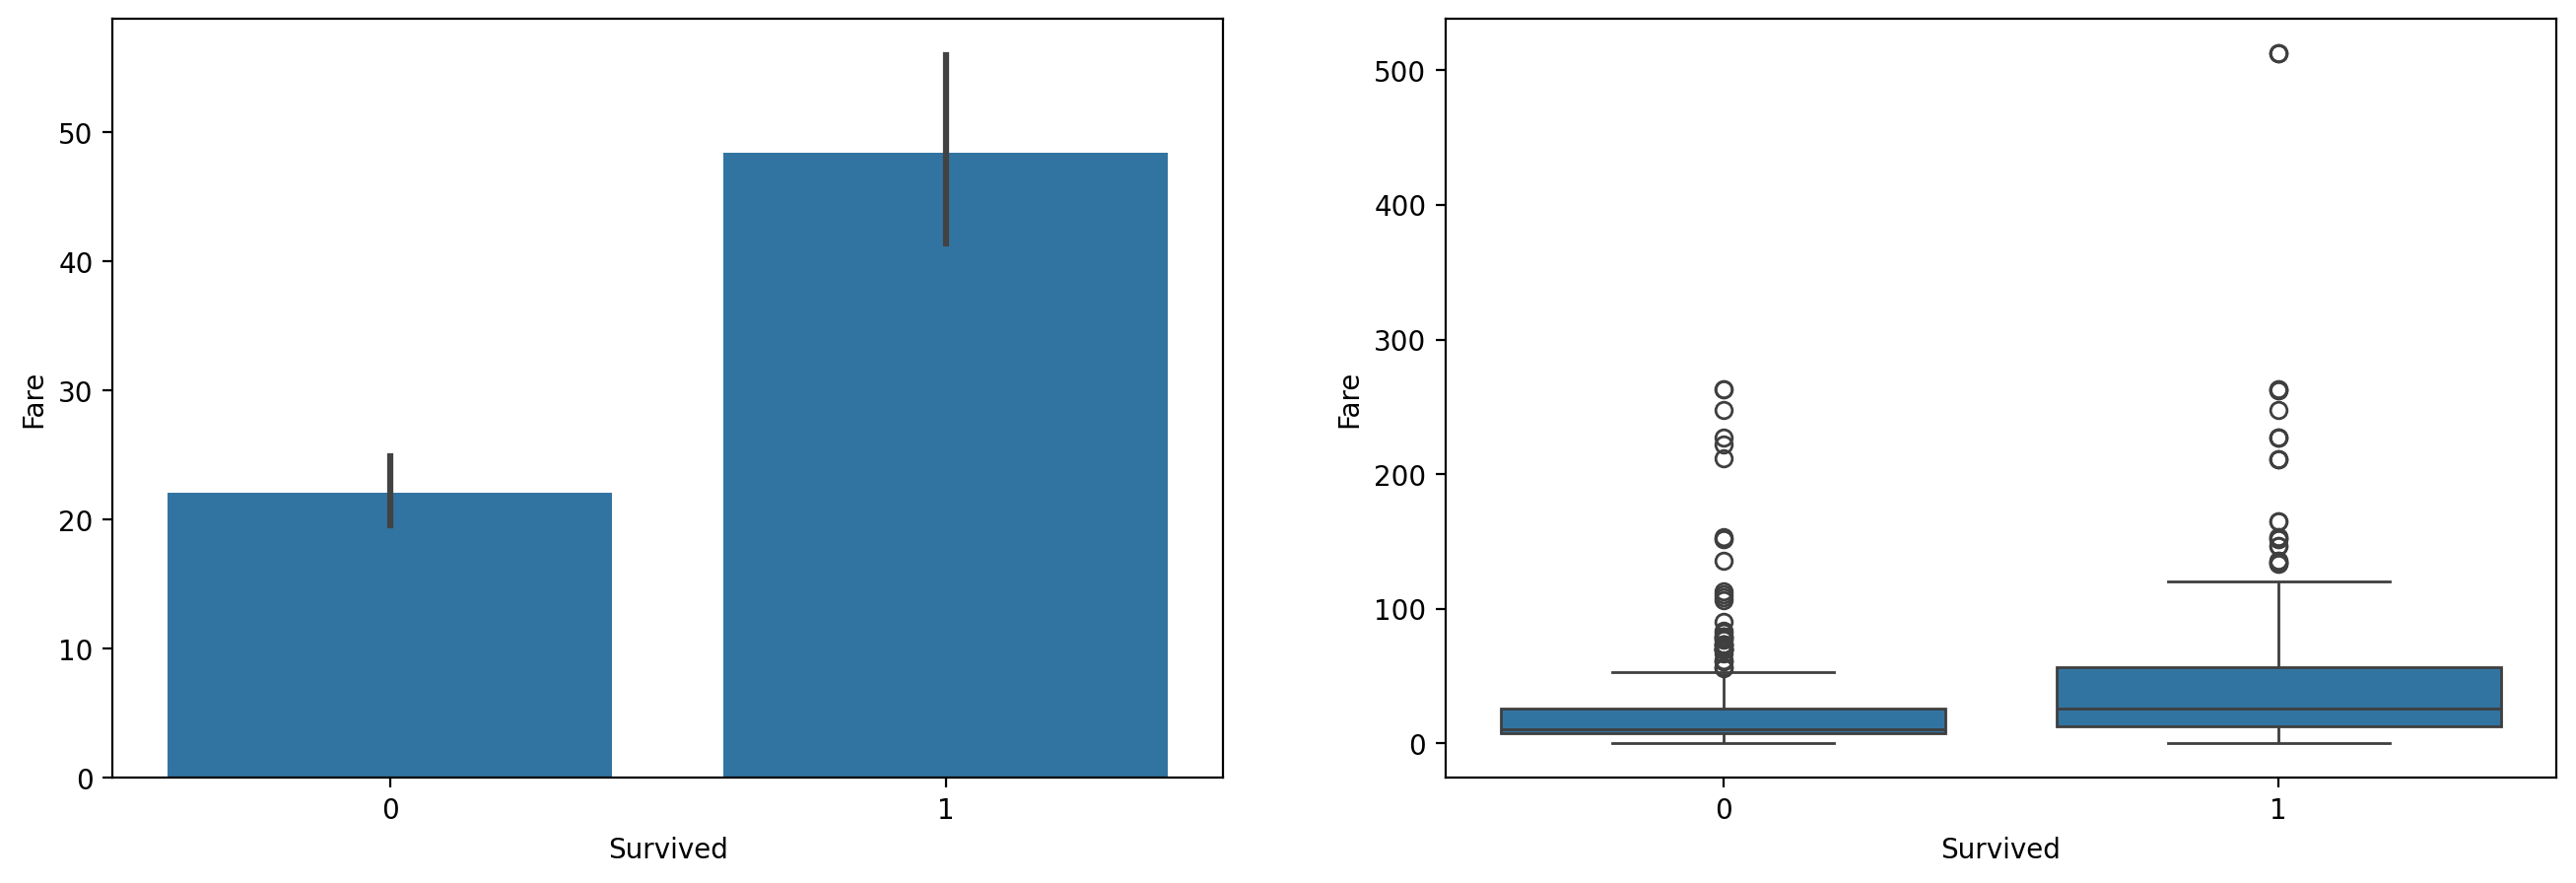

In [31]:
# Fare and Passenger class
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x='Survived', y='Fare', data = d1)
plt.subplot(1,2,2)
sns.boxplot(x='Survived',y= 'Fare', data =d1)#those who survived pay more fare

<Axes: ylabel='Age'>

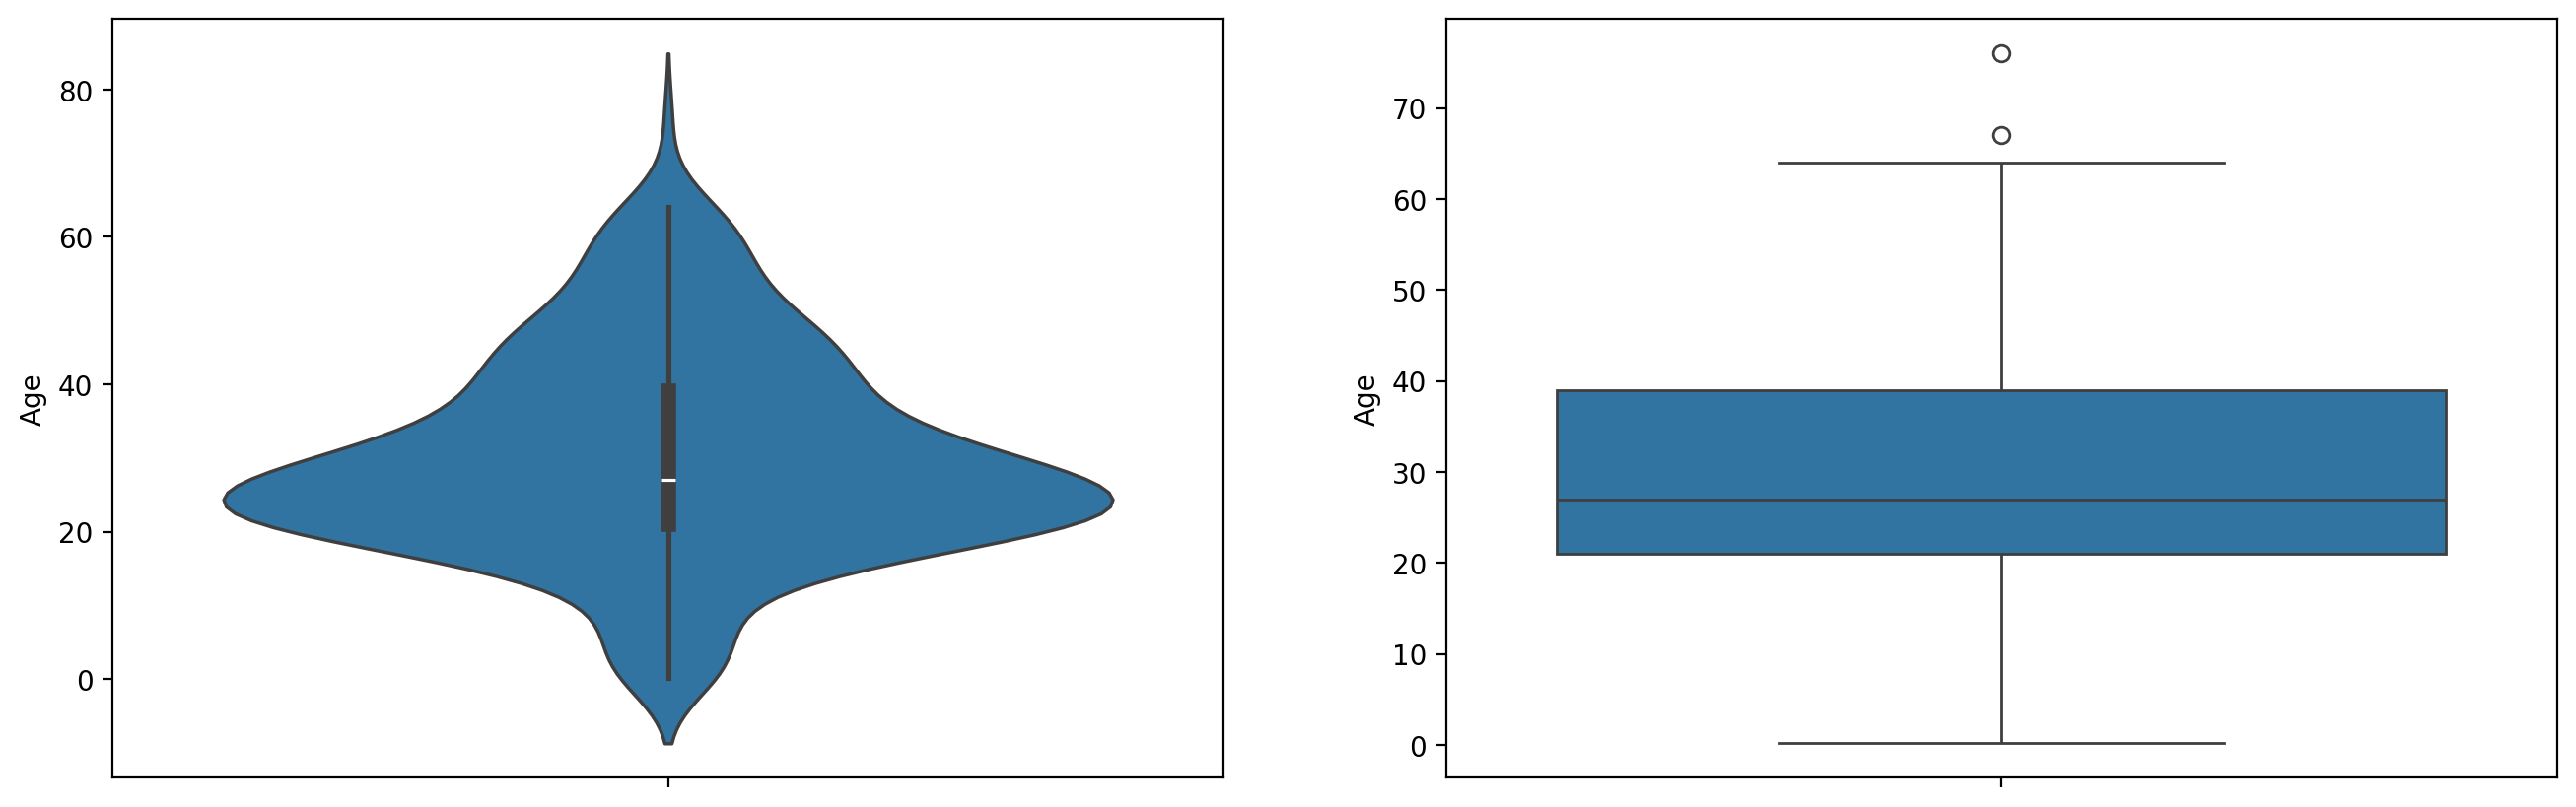

In [32]:
# Age
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.violinplot(y = 'Age', data = d2)
plt.subplot(1,2,2)
sns.boxplot(y = 'Age', data = d2)# age range from 20 to 40 as most

<Axes: xlabel='Survived', ylabel='Age'>

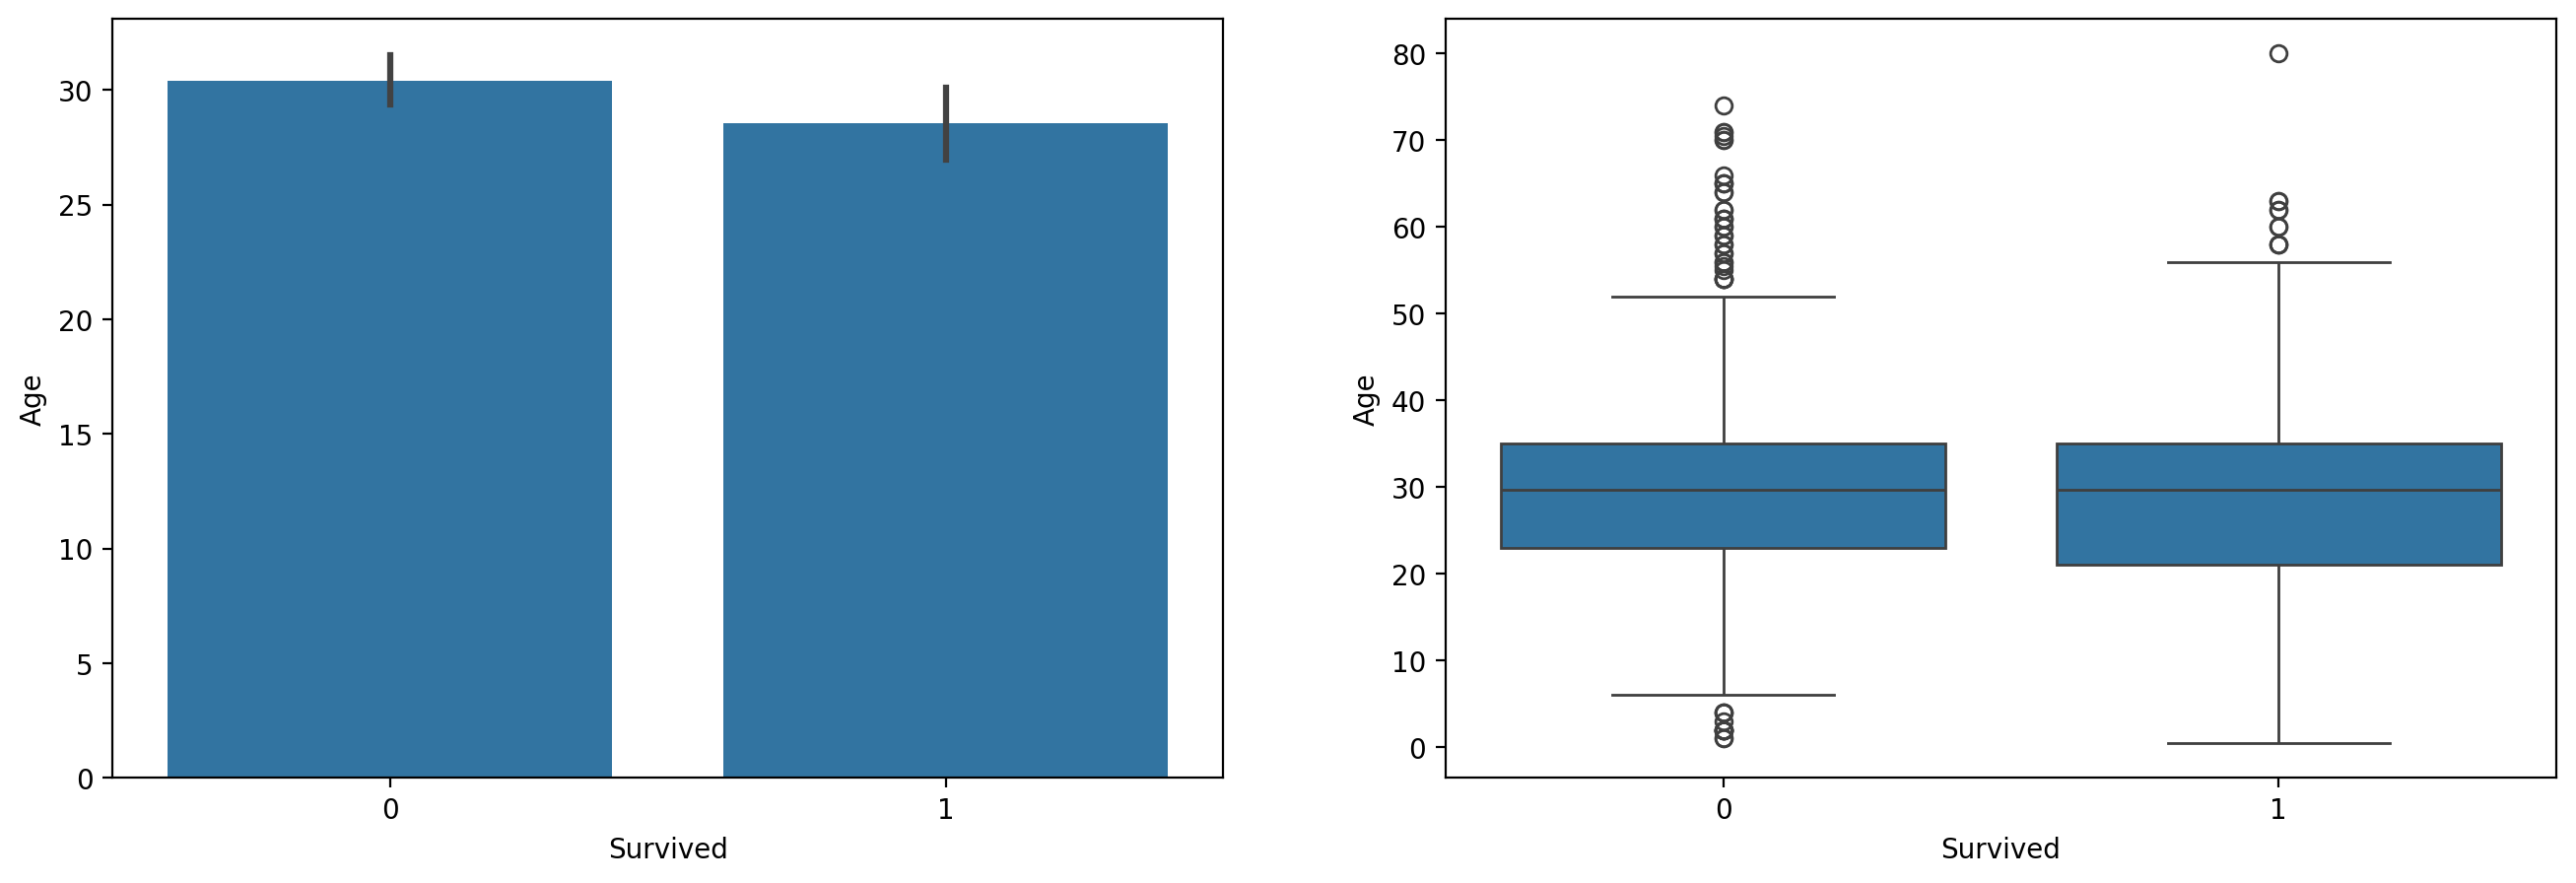

In [33]:
# Age and Survived
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x='Survived', y='Age', data = d1)
plt.subplot(1,2,2)
sns.boxplot(x='Survived', y='Age', data = d1)#no difference with survival and dead based on age

<Axes: xlabel='family_members', ylabel='count'>

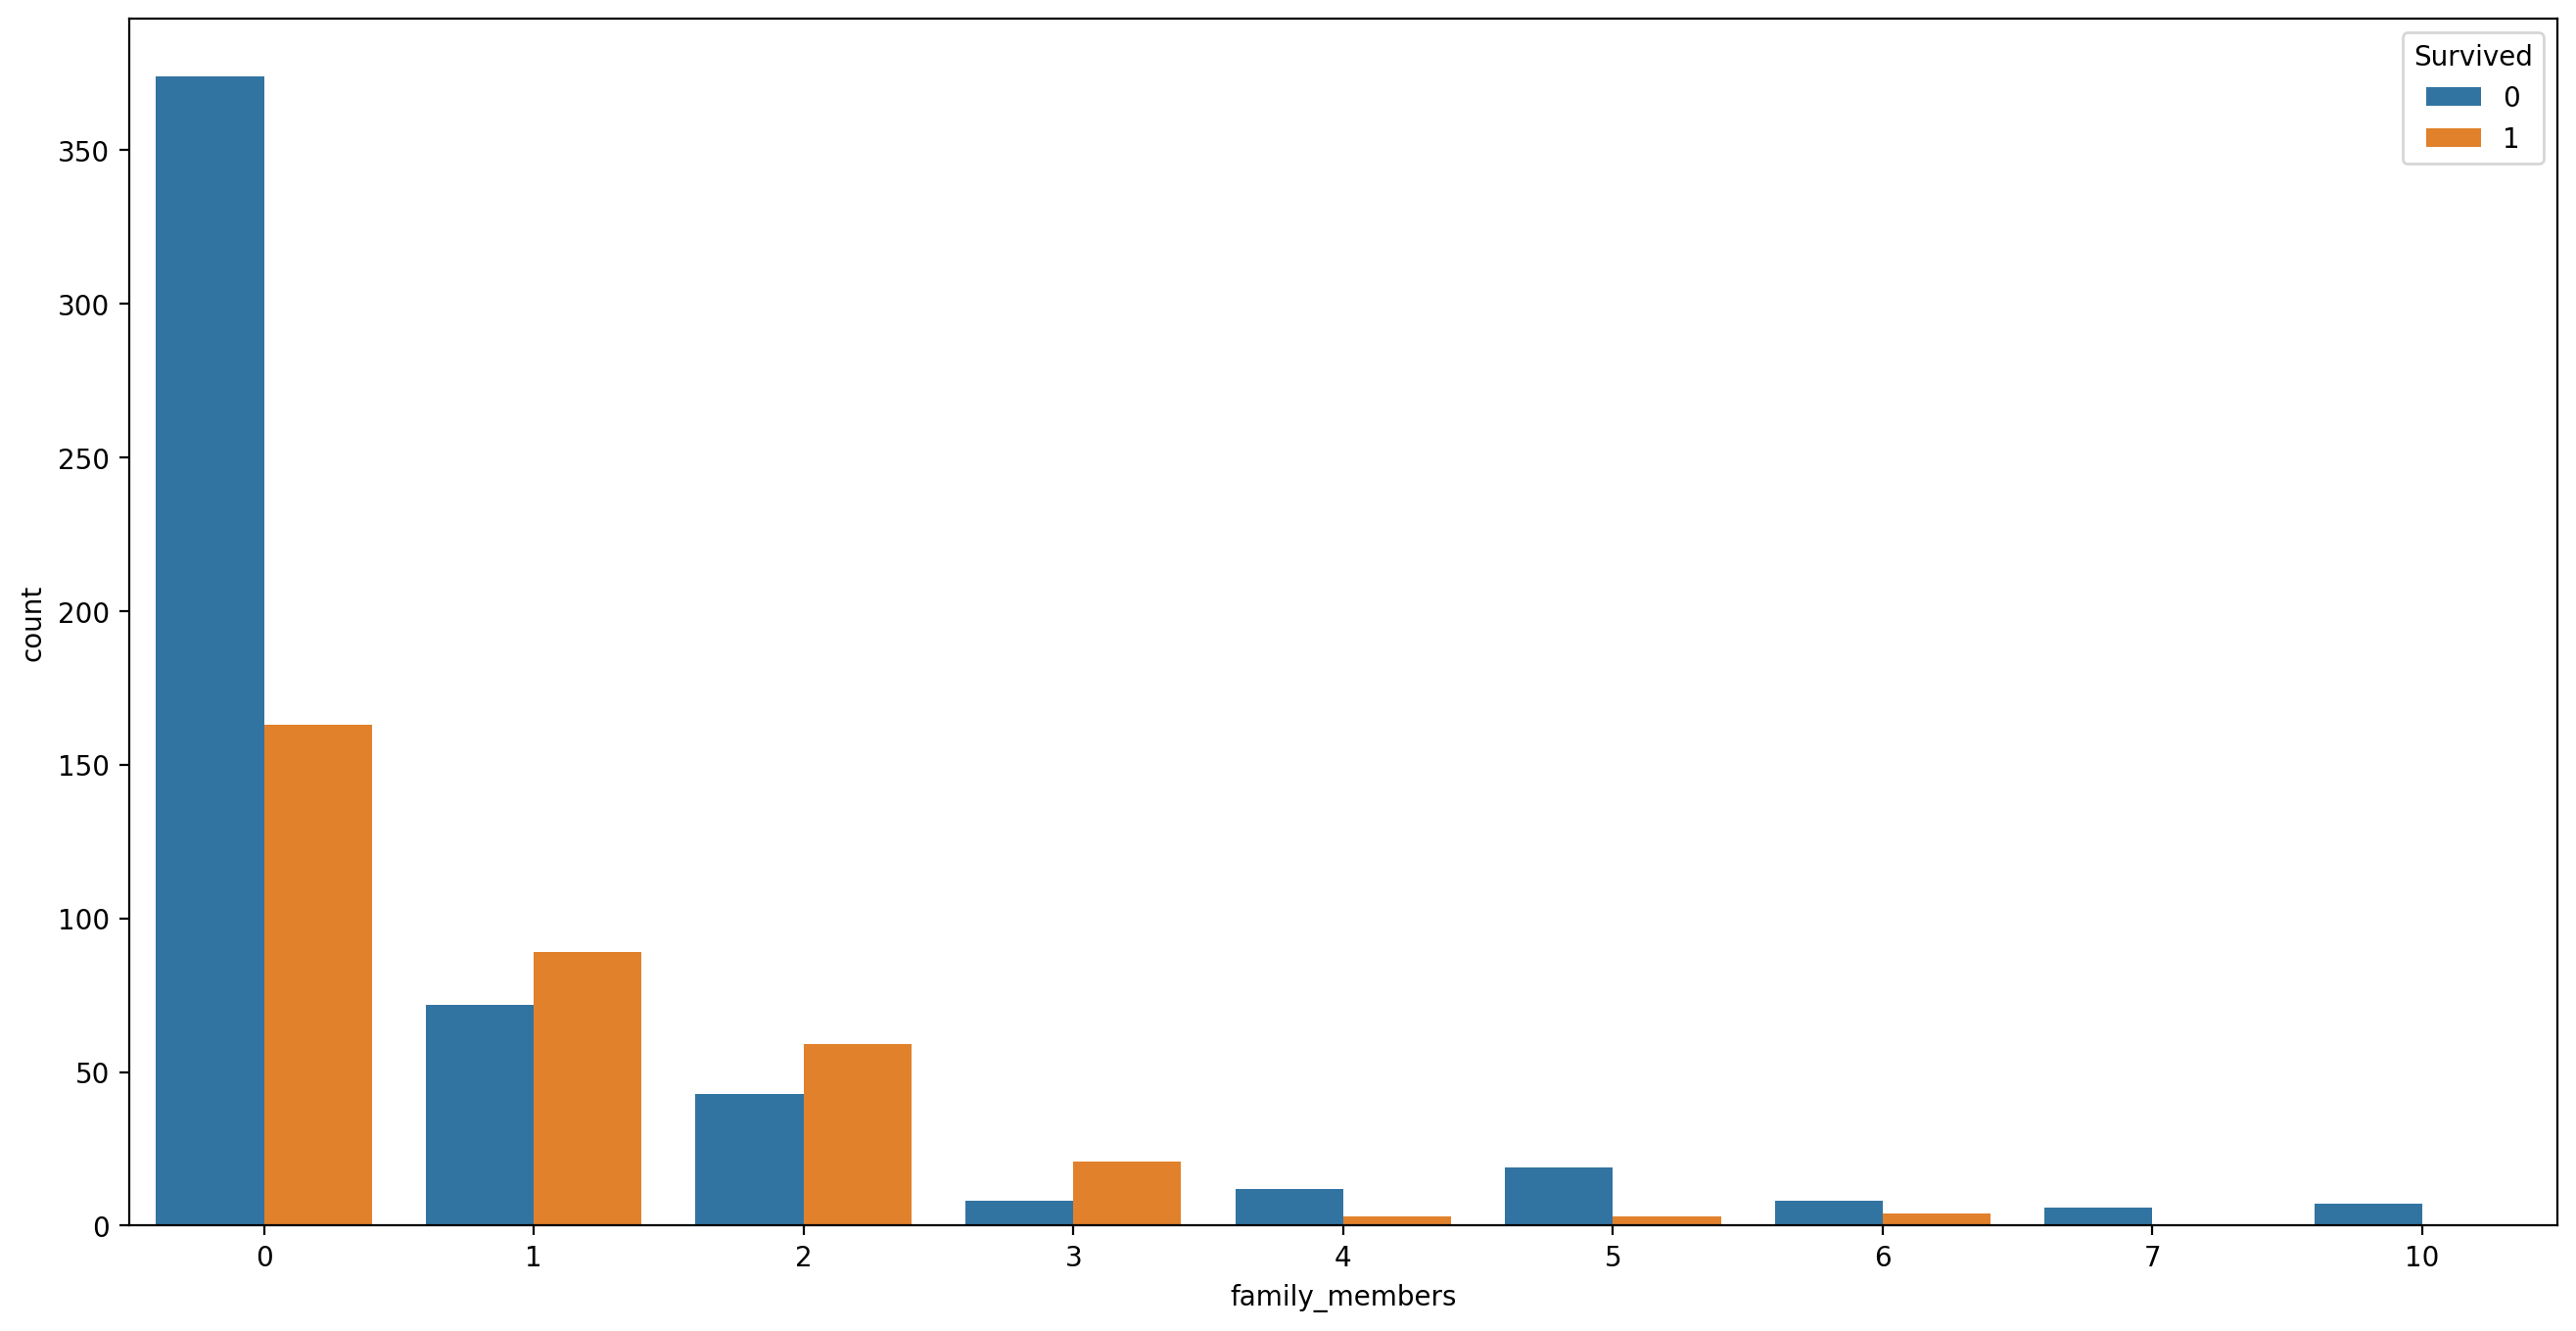

In [34]:
# Family members and survived
plt.figure(figsize = (16,8), dpi = 200)
sns.countplot(x='family_members', hue = 'Survived', data = d1)#those who travel with less family members survived more

In [35]:
obj = d1.select_dtypes(include=['object']).columns
obj#seperate obj columns from data

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [36]:
num = d1.select_dtypes(include=['int','float']).columns
num#seperate numeric columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'family_members'], dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in d1.columns:
    if d1[col].dtype=='object':
        d1[col] = label_encoder.fit_transform(d1[col])#encode object columns

In [38]:
d1.head()#table check after encoding

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,108,1,22.0,523,7.2500,2,1
1,2,1,1,190,0,38.0,596,71.2833,0,1
2,3,1,3,353,0,26.0,669,7.9250,2,0
3,4,1,1,272,0,35.0,49,53.1000,2,1
4,5,0,3,15,1,35.0,472,8.0500,2,0


In [39]:
X = d1.drop(['Survived'], axis=1)
Y = d1[['Survived']]
X.head()#independent and dependent features

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,3,108,1,22.0,523,7.2500,2,1
1,2,1,190,0,38.0,596,71.2833,0,1
2,3,3,353,0,26.0,669,7.9250,2,0
3,4,1,272,0,35.0,49,53.1000,2,1
4,5,3,15,1,35.0,472,8.0500,2,0


In [40]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape) #print the shape of x and y

Independent Feature Set Shape :  (891, 9)
Dependent Feature Shape       :  (891, 1)


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)#split data

In [42]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labesls Shape : ', y_test.shape)#shape of data

Training Data Shape   :  (712, 9)
Training Labels Shape :  (712, 1)
Testing Data Shape    :  (179, 9)
Testing Labesls Shape :  (179, 1)


In [43]:
model = tf.keras.models.Sequential()
model.add(Dense(128, activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()#model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)#compile model

In [46]:
history = model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size = 32,
    validation_data = (x_test,y_test),
    verbose = 1
)#fit the model

Epoch 1/200
23/23 [==============================] - 0s 11ms/step - loss: 0.4619 - accuracy: 0.7683 - val_loss: 0.6430 - val_accuracy: 0.6648
Epoch 2/200
23/23 [==============================] - 0s 6ms/step - loss: 0.5441 - accuracy: 0.7416 - val_loss: 0.6270 - val_accuracy: 0.6704
Epoch 3/200
23/23 [==============================] - 0s 9ms/step - loss: 0.5071 - accuracy: 0.7500 - val_loss: 0.5995 - val_accuracy: 0.7039
Epoch 4/200
23/23 [==============================] - 0s 7ms/step - loss: 0.4924 - accuracy: 0.7697 - val_loss: 0.5854 - val_accuracy: 0.7039
Epoch 5/200
23/23 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.7416 - val_loss: 0.6275 - val_accuracy: 0.6816
Epoch 6/200
23/23 [==============================] - 0s 7ms/step - loss: 0.4736 - accuracy: 0.7612 - val_loss: 0.6158 - val_accuracy: 0.6983
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7795 - val_loss: 0.6035 - val_accuracy: 0.7151
Epoch 8/200


In [47]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']#accuracy and loss

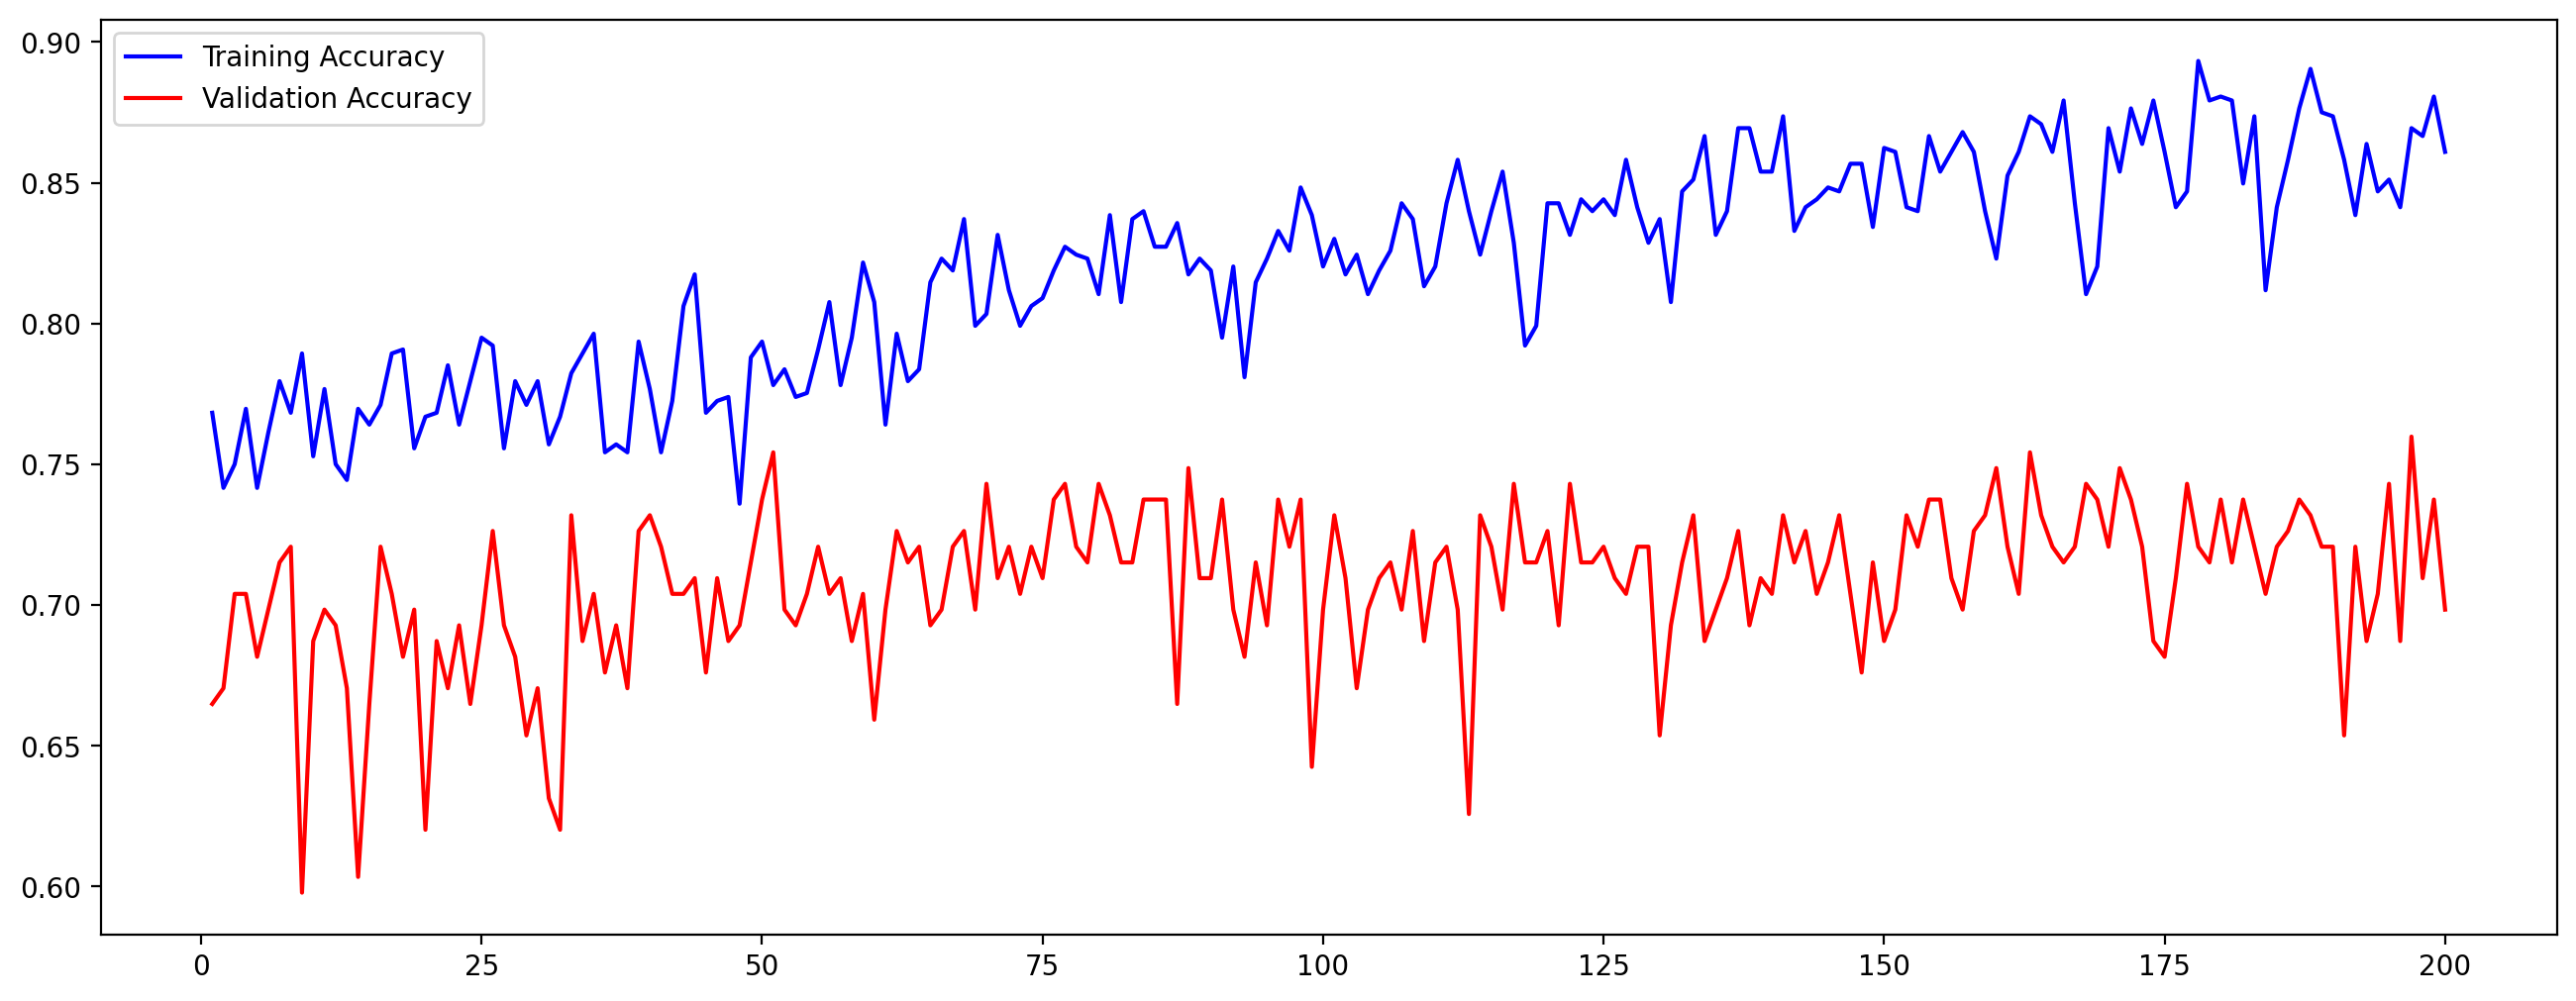

In [48]:
num_epochs = range(1,201)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()#plot show accuracy

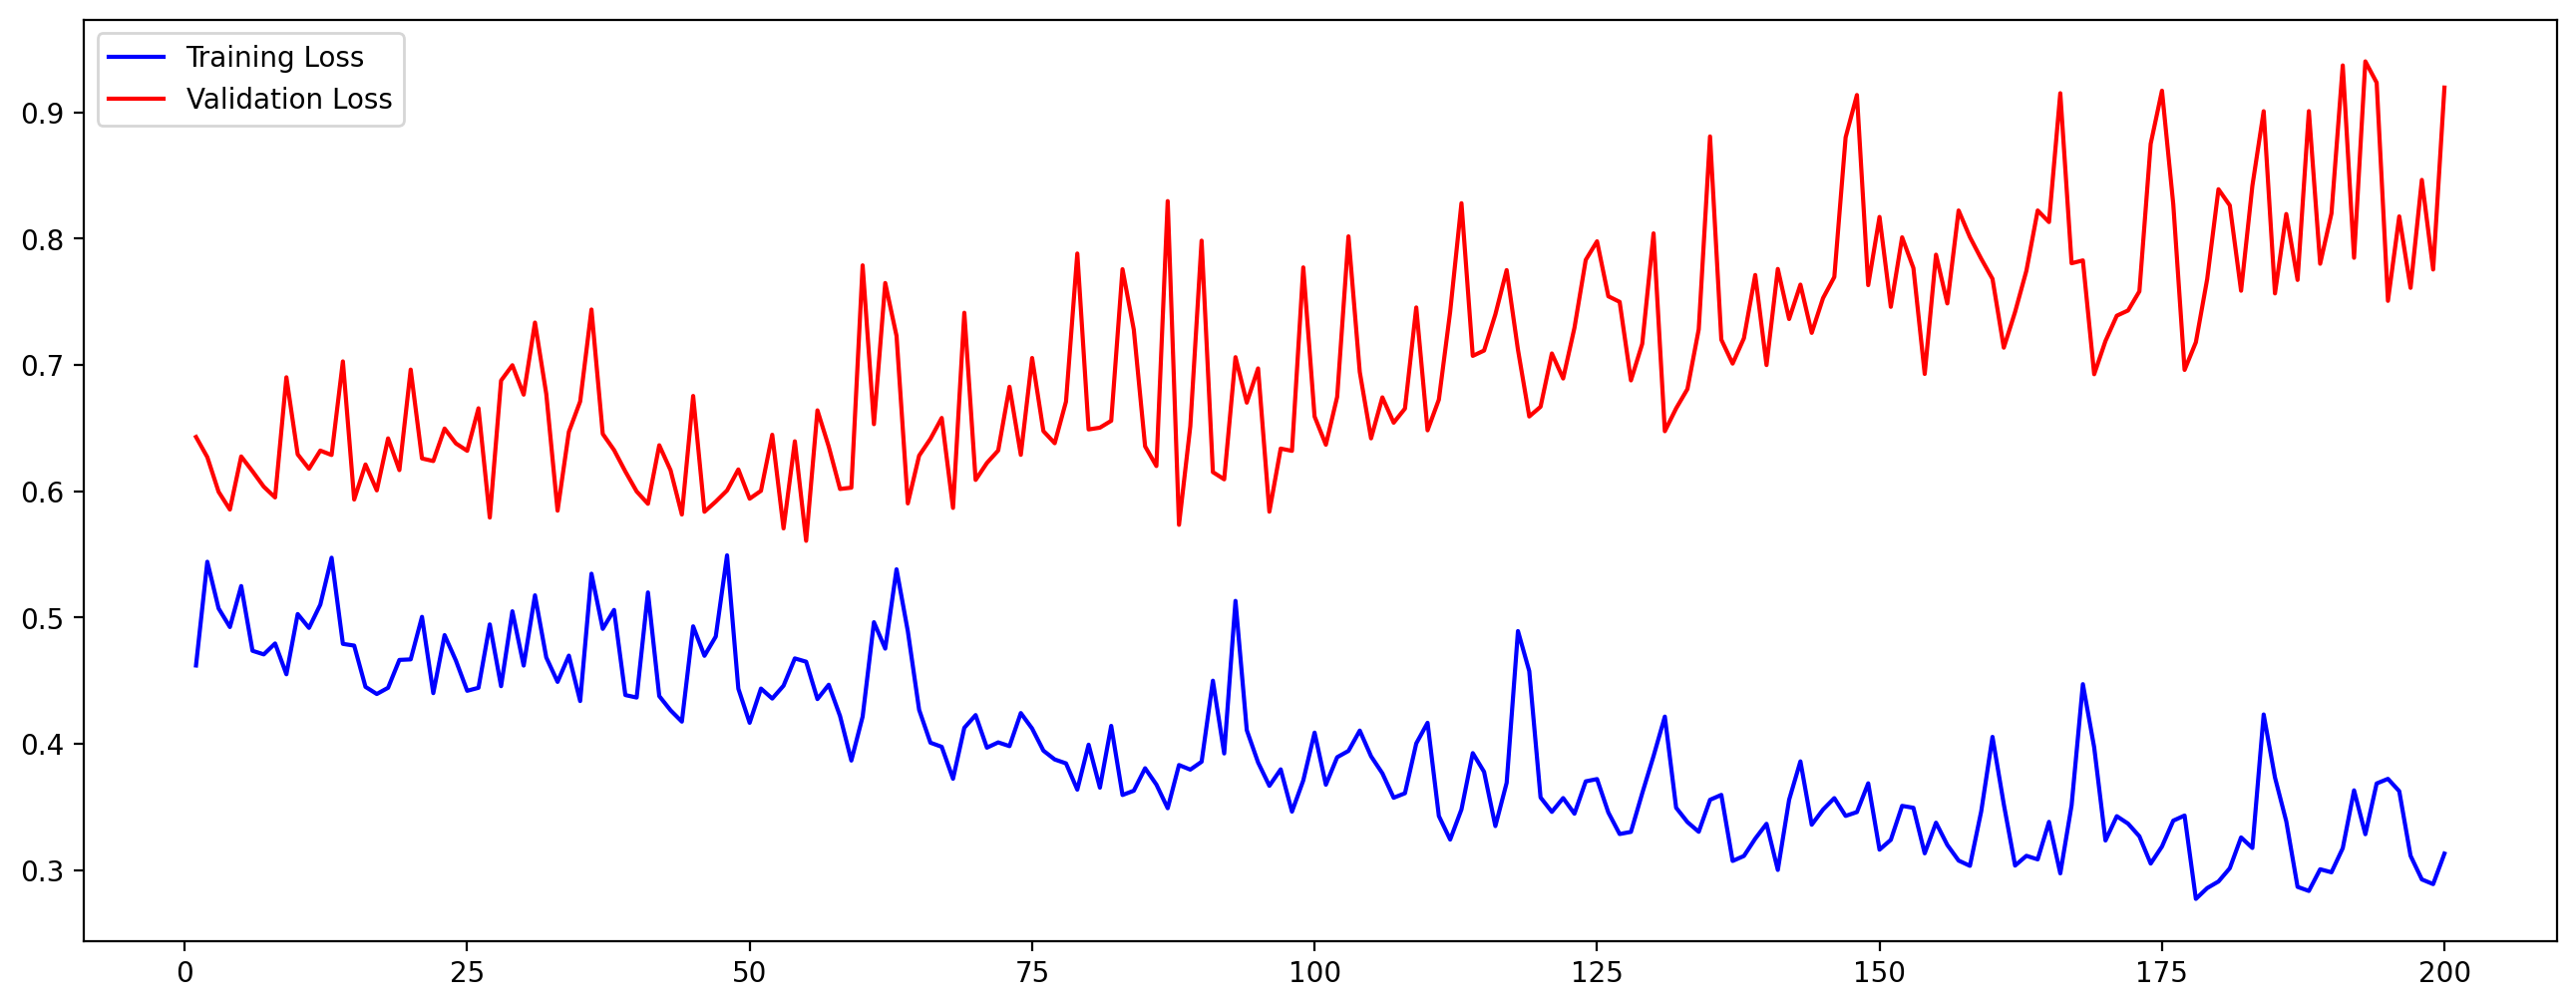

In [49]:
num_epochs = range(1,201)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()#plot show loss

In [50]:
def predict_survival(x):
  survival = model.predict(x)
  if survival > 0.5:
    print("Person Survived")
  else:
    print("Person Died")

In [51]:
predict_survival(x_test[1:2])#prediction 

1/1 [==============================] - 0s 137ms/step
Person Died
